# Question 3

Approach:

1. finding best parameters (using grid search) and then applying it to get the accuracy
2. we found that RFC is more accurate than SVM and MLP classifier for this problem
3. So we have used RFC to make prediction on test data

Importing modules, fetching and splitting data for training and testing

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns

# loading the data
wine_train = np.loadtxt('wine.train',delimiter=',')
wine_test = np.loadtxt('wine.test',delimiter=',')

x = wine_train[:, 1:13]
y = wine_train[:, 0]
X_Test = wine_test[:, 1:13]

x_train, x_test, y_train, y_test = train_test_split(x,y)

Finding the best parameters for SVM classifier

In [2]:
# finding best parameter for SVM
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)

#cross validation for SVM
cv_SVM = StratifiedShuffleSplit(n_splits=15, test_size=0.2, random_state=0)
grid_SVM = GridSearchCV(svm.SVC(kernel='linear'), param_grid=param_grid, cv=cv_SVM)
grid_SVM.fit(x_train, y_train)

print("The best parameters for SVM are %s" % (grid_SVM.best_params_))

The best parameters for SVM are {'C': 0.1, 'gamma': 1e-09}


Applying founded parameters to train the SVM model

In [3]:
c = grid_SVM.best_params_['C']
gamma = grid_SVM.best_params_['gamma']
model_SVM = svm.SVC(kernel='linear', C=c, gamma=gamma)
model_SVM.fit(x_train, y_train)
y_predicted_SVM = model_SVM.predict(x_test)
SVM_Accuracy = np.mean(y_test == y_predicted_SVM) * 100
print('Percentage correct (accuracy) of SVM : ', np.mean(y_test == y_predicted_SVM))

Percentage correct (accuracy) of SVM :  0.9666666666666667


Finding the best parameters for RF classifier

In [4]:
param_grid = { 
    'n_estimators': [10, 60],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,7]
}

temp_model_RF = RandomForestClassifier(n_estimators=10)
cv_RFC = GridSearchCV(estimator=temp_model_RF, param_grid=param_grid, cv= 10)
cv_RFC.fit(x_train,y_train)
print("The best parameters for RFC are %s" % (cv_RFC.best_params_))

The best parameters for RFC are {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 10}


Applying founded parameters to train the RF model

In [5]:
max_depth = cv_RFC.best_params_['max_depth']
max_features = cv_RFC.best_params_['max_features']
n_estimators = cv_RFC.best_params_['n_estimators']

# training RF classifier
model_RF = RandomForestClassifier(n_estimators=n_estimators, bootstrap=True, max_features = max_features,
                                    max_depth = max_depth,min_samples_split =3, n_jobs = -1,
                                    random_state = 0, verbose = 0,oob_score = True)
model_RF.fit(x_train,y_train)
y_predicted_RF = model_RF.predict(x_test)
RFC_Accuracy = np.mean(y_test == y_predicted_RF) * 100
print('Percentage correct (accuracy) of RFC : ', np.mean(y_test == y_predicted_RF))

Percentage correct (accuracy) of RFC :  1.0


C:\Users\nirav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\nirav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Training the MLP classifier

In [6]:
model_MLP= MLPClassifier(hidden_layer_sizes=(10, 20, 10))
model_MLP.fit(x_train,y_train)
y_predicted_MLP = model_MLP.predict(x_test)
MLP_Accuracy = np.mean(y_test == y_predicted_MLP)* 100
print('Percentage correct (accuracy) of MLP : ', np.mean(y_test == y_predicted_MLP))

Percentage correct (accuracy) of MLP :  0.4


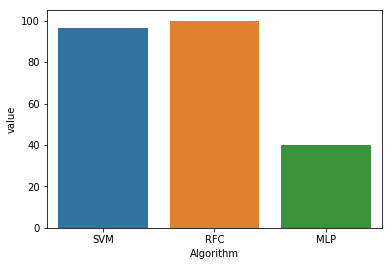

In [7]:
# plotting the grapgh

dataFrame = pd.DataFrame(data={'Algorithm': ['SVM','RFC', 'MLP'],
      'Accuracy':[SVM_Accuracy, RFC_Accuracy, MLP_Accuracy]})
tempDataFrame = pd.melt(dataFrame,id_vars = ['Algorithm'],value_vars =['Accuracy'])
my_plot = sns.barplot(x="Algorithm", y="value", data=tempDataFrame)

We can see that RF Classifier is more accuate than the rest of 2 algorithms. Hence, we will use it to predict the test values

In [8]:
# applying test data
y_predicted = model_RF.predict(X_Test)
np.savetxt('output.csv', y_predicted)
print("Predictions is saved in CSV file")

Predictions is saved in CSV file
